In [2]:
using Plots
using Statistics

In [3]:
plot();

# Zad 3

In [4]:
Γₜ(X,h)=sum((X[1:length(X)-abs(h)].-mean(X)) .* (X[abs(h)+1:end].-mean(X)))/length(X)

Γₜ (generic function with 1 method)

In [5]:
N(;μ=0,σ=2,n=1e3)=σ.*[√(-2log(rand()))*cos(2π*rand()) for _ in 1:n].+μ

N (generic function with 1 method)

In [6]:
Γ(X)=h->Γₜ(X,h)

Γ (generic function with 1 method)

In [7]:
Ns=[50,1e2,1e3]
γ=[Γ(N(n=i)) for i in Ns]

3-element Vector{var"#4#5"{Vector{Float64}}}:
 #4 (generic function with 1 method)
 #4 (generic function with 1 method)
 #4 (generic function with 1 method)

In [8]:
ρ(h,γ)=γ(h)/γ(0)

ρ (generic function with 1 method)

In [9]:
γ[1](0),γ[2](0),γ[3](0)

(3.4256494645588402, 4.370420626332359, 3.9266446079645383)

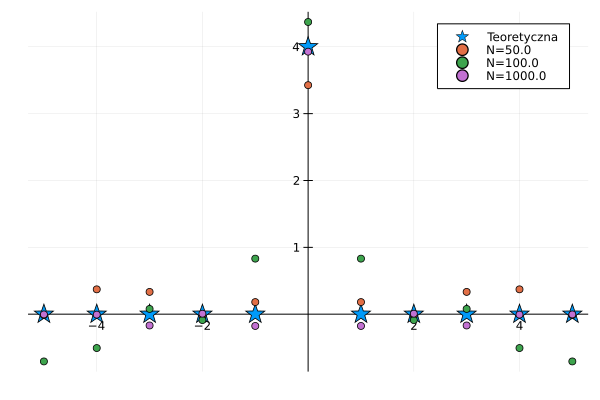

In [10]:
scatter(-5:5,[0,0,0,0,0,4,0,0,0,0,0],shape=:star,markersize=10, label="Teoretyczna")
for i in 1:3
    scatter!(-5:5,γ[i],label="N=$(Ns[i])")
end
scatter!(framestyle=:origin)

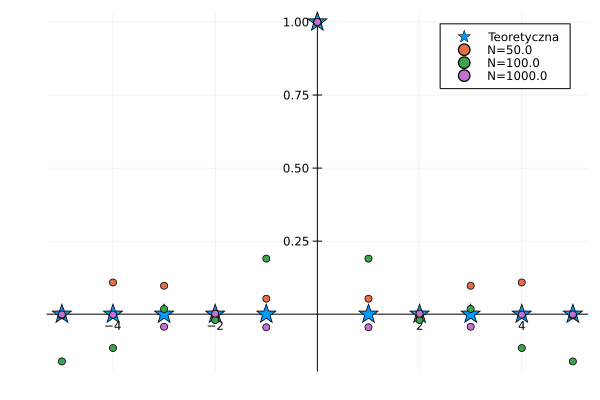

In [11]:
scatter(-5:5,[0,0,0,0,0,1,0,0,0,0,0],shape=:star,markersize=10, label="Teoretyczna")
for i in 1:3
    scatter!(-5:5,t->ρ(t,γ[i]),label="N=$(Ns[i])")
end
scatter!(framestyle=:origin)

## b)

In [12]:
teor(h)= h==1 ? 4 : 0

teor (generic function with 1 method)

In [13]:
ν(n, teor)=begin
    γ=Γ(N(n=n))
    sum(abs(γ(h)-teor(h)) for h in -(n-1):(n-1))/n
end
v(X, teor)=begin
    n=length(X)
    γ=Γ(X)
    sum(abs(γ(h)-teor(h)) for h in -(n-1):(n-1))/n
end

v (generic function with 1 method)

In [14]:
X=N(n=1e3);

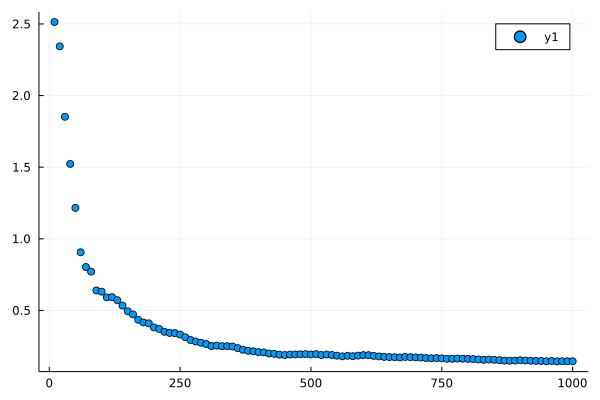

In [15]:
scatter(10:10:1000, n->v(X[1:n], teor))

# Zad 4

In [16]:
θ=3
σ=2
μ=0

0

In [17]:
X=N(n=1e4+1, μ=μ, σ=σ);

In [18]:
Y=X[2:end].+θ.*X[1:end-1];

In [19]:
γ=Γ(Y)

#4 (generic function with 1 method)

In [20]:
teor(h)= h==0 ? σ^2*(1+θ^2) : (h==1 ? σ^2*θ : 0)

teor (generic function with 1 method)

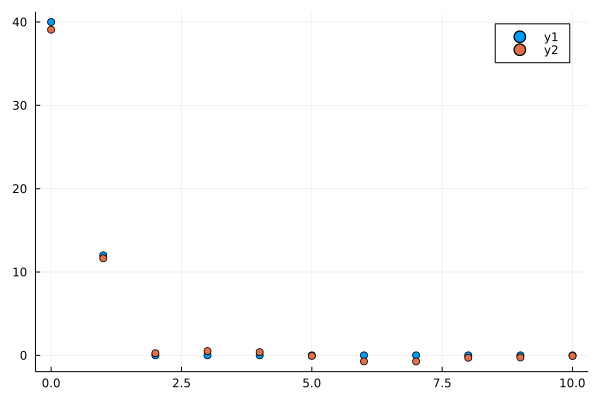

In [21]:
scatter(0:10, teor)
scatter!(0:10, γ)

# Zad 5

In [22]:
θ=3
σ=1
μ=0
a=1/3
p=1/7
n=Int(1e3)

1000

In [23]:
X=N(n=n+1, μ=μ, σ=σ);

In [24]:
Y=X[2:end].+θ.*X[1:end-1].+[i<1-p ? 0 : i<1-p/2 ? a : -a for i in rand(n)];

In [25]:
γ=Γ(Y)

#4 (generic function with 1 method)

In [26]:
Ρₕ(X,h)=1/(length(X)-h)/(length(X)-h-1)*sum(sign( (X[i]-X[j])*(X[i+h]-X[j+h]) ) for i in 2:length(X)-h, j in 1:length(X)-h if j<i)

Ρₕ (generic function with 1 method)

In [27]:
Ρ(X)=h->Ρₕ(X,h)

Ρ (generic function with 1 method)

In [28]:
rho=Ρ(Y)

#22 (generic function with 1 method)

In [29]:
rho(0)

0.49999999999999994

In [30]:
Ρ₂ₕ(X,h)=1/(length(X)-h)*sum(sign( (X[i]-median(X))*(X[i+h]-median(X)) ) for i in 1:length(X)-h)
Ρ₂(X)=h->Ρ₂ₕ(X,h)

Ρ₂ (generic function with 1 method)

In [31]:
rho₂=Ρ₂(Y)

#26 (generic function with 1 method)

In [32]:
median([1,2,3,4,5])

3.0

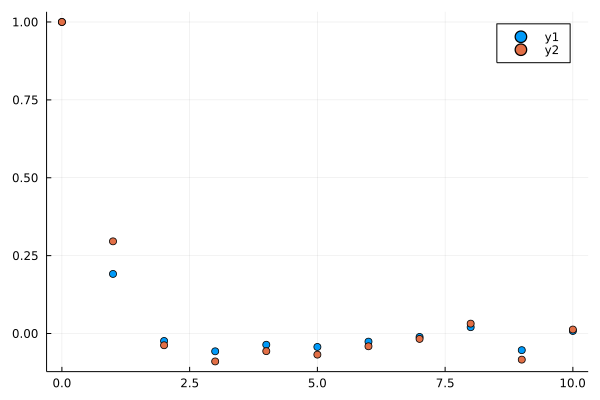

In [33]:
scatter(0:10, rho₂)
scatter!(0:10, t->sin(π/2*rho₂(t)))


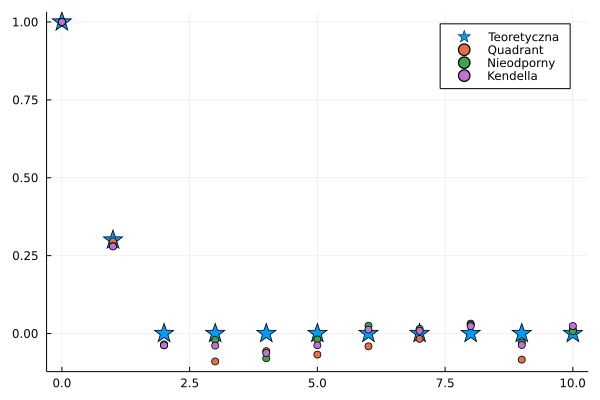

In [34]:
scatter(0:10, h->( h==0 ? 1 : h==1 ? θ/(1+θ^2) : 0 ),shape=:star,markersize=10, label="Teoretyczna")
scatter!(0:10, t->sin(π/2*rho₂(t)), label="Quadrant")
scatter!(0:10,t->γ(t)/γ(0), label="Nieodporny")
scatter!(0:10, t->sin(π*rho(t)), label="Kendella")

In [35]:
θ=3
σ=1
μ=0
a=1/3
p=1/7
n=Int(1e3)

1000

In [43]:
zad5(;p=1/7,a=1/3,θ=3,μ=0,σ=1,n=1000)=begin
    
    Xₜₑₘₚ=N(n=n+1, μ=μ, σ=σ);
    err=[i<1-p ? 0 : i<1-p/2 ? a : -a for i in rand(n)]
    X=Xₜₑₘₚ[2:end]+θ.*Xₜₑₘₚ[1:end-1]
    Y=X+err
    γₓ=Γ(X)
    γ=Γ(Y)
    ρₓ₁=Ρ(X)
    ρₓ₂=Ρ₂(X)
    ρ₁=Ρ(Y)
    ρ₂=Ρ₂(Y)
    
    pltₑ=histogram(err, label="Błąd")
    plt11=scatter(X, leg=false)
    plt21=scatter(Y, leg=false)
    scatter(0:10, h->( h==0 ? 1 : h==1 ? θ/(1+θ^2) : 0 ),shape=:star,markersize=5, label="Teoretyczna")
    scatter!(0:10, t->sin(π/2*ρₓ₂(t)), label="Quadrant")
    scatter!(0:10,t->γₓ(t)/γₓ(0), label="Nieodporny")
    scatter!(0:10, t->sin(π*ρₓ₁(t)), label="Kendella")
    plt12=plot!()
    scatter(0:10, h->( h==0 ? 1 : h==1 ? θ/(1+θ^2) : 0 ),shape=:star,markersize=5, label="Teoretyczna")
    scatter!(0:10, t->sin(π/2*ρ₂(t)), label="Quadrant")
    scatter!(0:10,t->γ(t)/γ(0), label="Nieodporny")
    scatter!(0:10, t->sin(π*ρ₁(t)), label="Kendella")
    plt22=plot!()
    plot(plt11, plt12, plt21, plt22, layout=(2,2))
    plot!(),pltₑ
end

zad5 (generic function with 1 method)

In [44]:
zad5(a=200)

(Plot{Plots.GRBackend() n=10}, Plot{Plots.GRBackend() n=1})

In [45]:
plt=ans

(Plot{Plots.GRBackend() n=10}, Plot{Plots.GRBackend() n=1})

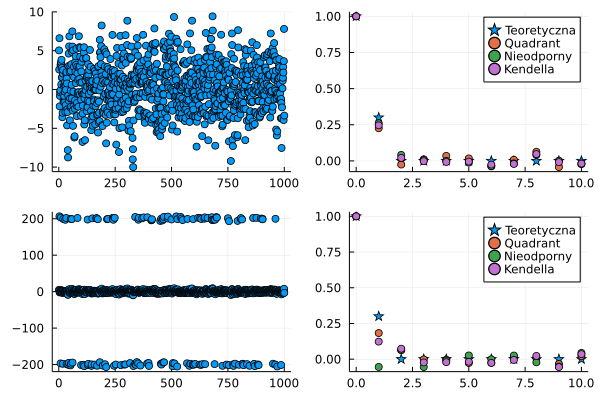

In [46]:
plt[1]

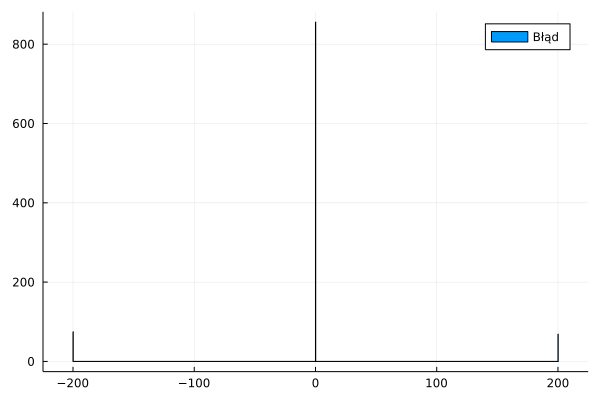

In [47]:
plt[2]

## Dodane boxplot

In [209]:
zad5_data_to_box(;p=1/7,a=1/3,θ=3,μ=0,σ=1,n=1000)=begin
    
    Xₜₑₘₚ=N(n=n+1, μ=μ, σ=σ);
    err=[i<1-p ? 0 : i<1-p/2 ? a : -a for i in rand(n)]
    X=Xₜₑₘₚ[2:end]+θ.*Xₜₑₘₚ[1:end-1]
    Y=X+err
    γ=Γ(Y)
    ρ₁=Ρ(Y)
    ρ₂=Ρ₂(Y)
    
    [[γ(h)  for h in 0:10]./γ(0),
     sin.(π .*[ρ₁(h) for h in 0:10]),
     sin.((π/2) .*[ρ₂(h) for h in 0:10])]
end

zad5_data_to_box (generic function with 1 method)

In [210]:
zad5_data_to_box()

3-element Vector{Vector{Float64}}:
 [1.0, 0.30808990714362877, -0.006007457167527123, -0.02132200426487123, -0.03775628218650095, -0.032487989634229844, -0.044800907967327754, -0.002700611104550778, 0.027234460354672637, 0.021842959680851808, -0.009626605528598743]
 [1.0, 0.3101280027946334, 0.011502010717919182, -0.009193584409293515, -0.024800004930241083, -0.01751080867993609, -0.03101176229170593, 0.01786524398628263, 0.027000292747397105, 0.0011367613081658312, -0.017142820862577172]
 [1.0, 0.30482686085895316, -0.034619853489090247, 0.023630643625345057, -0.009462487259231732, -0.039456999076252754, -0.0031605507276704836, 0.06796794440135184, 0.08855782348970034, -0.0712673183174202, -0.09189661315202745]

In [246]:
M=100
A=[1,2,5,10,40,50,100]

7-element Vector{Int64}:
   1
   2
   5
  10
  40
  50
 100

In [247]:
EN,EK,EQ=[zeros(11,Int(M),length(A)) for _ in 1:3];

In [248]:
using Dates
t=time()

1.67476990887e9

In [254]:
t=time()
for a in 1:length(A)
    for i in 1:M
        temp=zad5_data_to_box(a=A[a])
        EQ[:,i,a]=temp[1]
        EN[:,i,a]=temp[2]
        EK[:,i,a]=temp[3]
    end
end
time()-t

89.45899987220764

In [159]:
using StatsPlots

In [255]:
anim=@animate for a in 1:length(A)
    boxplot(title="Dla a=$(A[a])")
    for h in 0:10
        violin!(["$(h)"],EN[h+1,:,a], leg=false)
        violin!(["$(h)"],EQ[h+1,:,a], leg=false)
    end
end

Animation("C:\\Users\\Kacper\\AppData\\Local\\Temp\\jl_mdTSpv", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png"])

┌ Info: Saved animation to 
│   fn = C:\Git\Kaszcz\2\tmp.gif
└ @ Plots C:\Users\Kacper\.julia\packages\Plots\1KWPG\src\animation.jl:114


Plots.AnimatedGif("C:\\Git\\Kaszcz\\2\\tmp.gif")
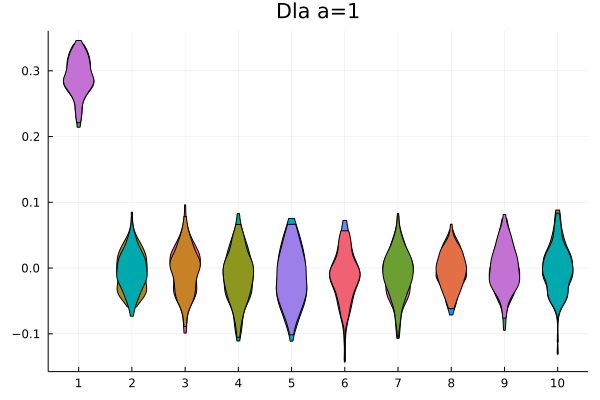

In [256]:
gif(anim,fps=1)

In [263]:
anim_box=@animate for a in 1:length(A)
    boxplot(title="Dla a=$(A[a])")
    for h in 1:10
        boxplot!(["$(h)"],EN[h+1,:,a], leg=false, c=:orange)
        boxplot!(["$(h)"],EQ[h+1,:,a], leg=false, c=:blue)
        boxplot!(["$(h)"],EK[h+1,:,a], leg=false, c=:green)
    end
end

Animation("C:\\Users\\Kacper\\AppData\\Local\\Temp\\jl_zfGEHi", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png"])

┌ Info: Saved animation to 
│   fn = C:\Git\Kaszcz\2\tmp.gif
└ @ Plots C:\Users\Kacper\.julia\packages\Plots\1KWPG\src\animation.jl:114


Plots.AnimatedGif("C:\\Git\\Kaszcz\\2\\tmp.gif")
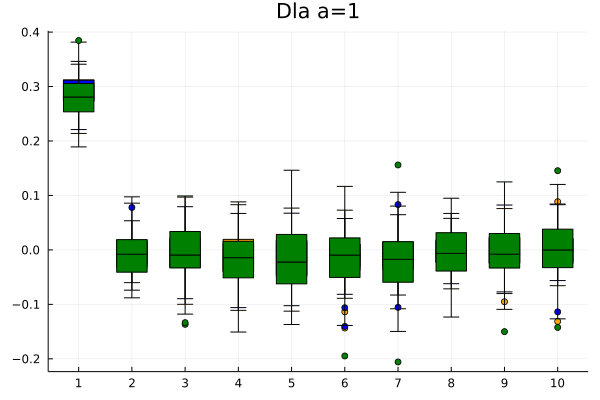

In [264]:
gif(anim_box,fps=1)

In [265]:
M=100
P=[0.01,0.02,0.05,0.1,0.3,0.5]
ENp,EKp,EQp=[zeros(11,Int(M),length(P)) for _ in 1:3];

In [267]:
t=time()
for p in 1:length(P)
    for i in 1:M
        temp=zad5_data_to_box(p=P[p])
        EQp[:,i,p]=temp[1]
        ENp[:,i,p]=temp[2]
        EKp[:,i,p]=temp[3]
    end
end
time()-t

70.27600002288818

In [273]:
anim_box_p=@animate for p in 1:length(P)
    boxplot(title="Dla p=$(P[p])")
    for h in 1:10
        boxplot!(["$(h)"],EKp[h+1,:,p], leg=false, c=:green)
        boxplot!(["$(h)"],ENp[h+1,:,p], leg=false, c=:orange)
        boxplot!(["$(h)"],EQp[h+1,:,p], leg=false, c=:blue)
    end
end

Animation("C:\\Users\\Kacper\\AppData\\Local\\Temp\\jl_6BLXmE", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png"])

┌ Info: Saved animation to 
│   fn = C:\Git\Kaszcz\2\tmp.gif
└ @ Plots C:\Users\Kacper\.julia\packages\Plots\1KWPG\src\animation.jl:114


Plots.AnimatedGif("C:\\Git\\Kaszcz\\2\\tmp.gif")
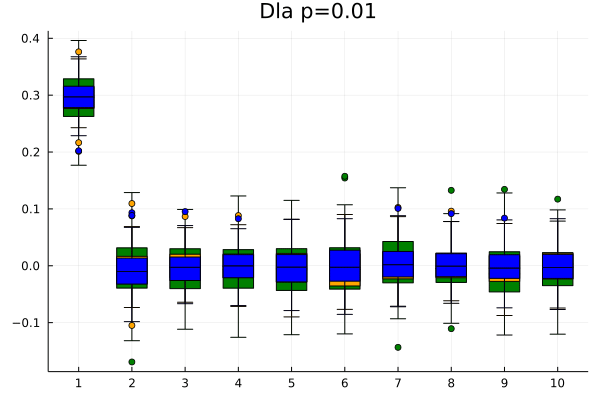

In [274]:
gif(anim_box_p,fps=1)

In [275]:
zad5_data_to_box_h(;h=1,p=1/7,a=1/3,θ=3,μ=0,σ=1,n=1000)=begin
    
    Xₜₑₘₚ=N(n=n+1, μ=μ, σ=σ);
    err=[i<1-p ? 0 : i<1-p/2 ? a : -a for i in rand(n)]
    X=Xₜₑₘₚ[2:end]+θ.*Xₜₑₘₚ[1:end-1]
    Y=X+err
    γ=Γ(Y)
    ρ₁=Ρ(Y)
    ρ₂=Ρ₂(Y)
    
    [γ(h)/γ(0),
     sin(π*ρ₁(h)),
     sin((π/2)*ρ₂(h))]
end

zad5_data_to_box_h (generic function with 1 method)

In [278]:
M=1000
P=[0.01,0.02,0.05,0.1,0.3,0.5]
ENh,EKh,EQh=[zeros(Int(M),length(P)) for _ in 1:3];

In [279]:
t=time()
for p in 1:length(P)
    for i in 1:M
        temp=zad5_data_to_box_h(p=P[p])
        EQh[i,p]=temp[1]
        ENh[i,p]=temp[2]
        EKh[i,p]=temp[3]
    end
end
time()-t

64.94700002670288

In [282]:
boxplot()
for p in 1:length(P)
    boxplot!(["$(P[p])"],EKh[:,p], leg=false, c=:green)
    boxplot!(["$(P[p])"],EQh[:,p], leg=false, c=:blue)
    boxplot!(["$(P[p])"],ENh[:,p], leg=false, c=:red)
end

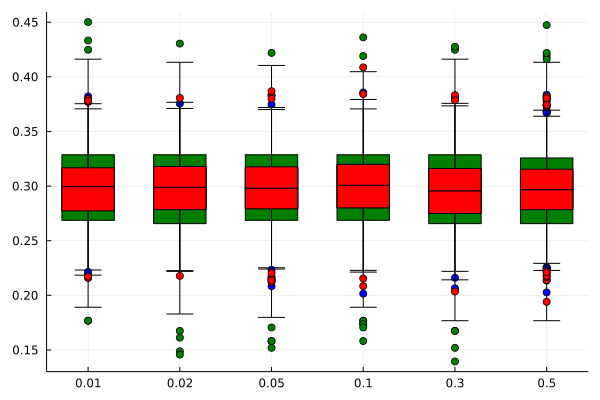

In [283]:
boxplot!()

In [284]:
t=time()
for p in 1:length(P)
    for i in 1:M
        temp=zad5_data_to_box_h(p=P[p],a=200)
        EQh[i,p]=temp[1]
        ENh[i,p]=temp[2]
        EKh[i,p]=temp[3]
    end
end
time()-t

66.92599987983704

In [287]:
boxplot()
for p in 1:length(P)
    boxplot!(["$(P[p])"],EKh[:,p], leg=false, c=:green)
    boxplot!(["$(P[p])"],EQh[:,p], leg=false, c=:blue)
    boxplot!(["$(P[p])"],ENh[:,p], leg=false, c=:red)
end

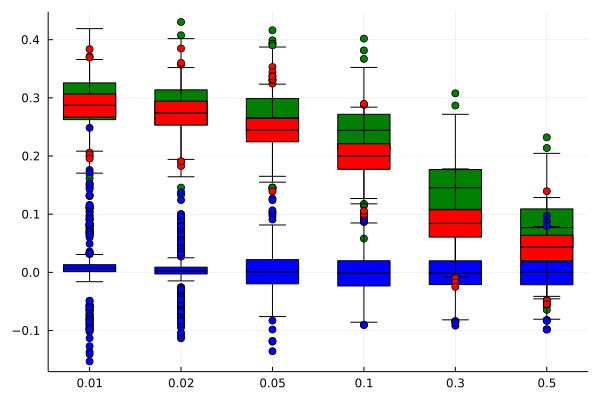

In [288]:
boxplot!()